<a href="https://colab.research.google.com/github/spatank/Curiosity/blob/master/v5/persistent_homology_Wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Curiosity/')

Mounted at /content/drive


In [2]:
!ls # run !ls to verify location

geometry_bettis.mat  persistent_homology_KNOT.ipynb  subj_101_bettis.mat  Wiki
KNOT		     persistent_homology_Wiki.ipynb  subj_106_bettis.mat


In [3]:
import glob
import scipy
import scipy.io as sio
from scipy.io import savemat

In [4]:
import sys
!{sys.executable} -m pip install Cython

In [5]:
import sys
!{sys.executable} -m pip install Ripser

     |████████████████████████████████| 71kB 3.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for Ripser: filename=ripser-0.6.0-cp37-cp37m-linux_x86_64.whl size=454890 sha256=2a228227da72499fa856639765815e16a4a28c5d25c74ece964ce793986b2e9f
  Stored in directory: /root/.cache/pip/wheels/95/1e/13/59da989de59903698d767dcb19414163e683a2dd31edf80417
Successfully built Ripser
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=6f8f0cd07d186910f2ce8cebc305ef8efe4be299ac2ba0c26d624876343c5e54
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built hopcroftkarp


In [6]:
from ripser import ripser
import numpy as np
import matplotlib.pyplot as plt

def get_barcode(filt_mat, maxdim = 2):
    """
    Calculates the persistent homology for a given filtration matrix
    ``filt_mat``, default dimensions 0 through 2. Wraps ripser.
    """
    b = ripser(filt_mat, distance_matrix = True, maxdim = maxdim)['dgms']
    return list(zip(range(maxdim + 1), b))

def plot_barcode(bars, length, dims = [0, 1, 2], end = True):
    """
    Takes in bars, as generated by, e.g., ripser, and plots the barcode.
    """
    bars = dict(bars)
    count = 1
    has_inf = False
    colors = ['xkcd:emerald green', 'xkcd:tealish', 'xkcd:peacock blue']
    # iterate through dimension
    for d in dims:
        bn = bars[d]
        bn = sorted(bn, key = lambda x: x[0])
        for b, i in zip(bn, range(len(bn))):
            # extend in the case of infinite cycles
            if b[1] == np.inf:
                has_inf = True
                b = (b[0], 1.3*length)
            # plot first one with label
            if i == 0:
                plt.plot(b, [count, count], color = colors[d],
                         label='{}-cycles'.format(d))
            else:
                plt.plot(b, [count, count], color = colors[d])
            count += 1
        count += 1
    # add end of filtration line
    plt.axvline(x = length, color = 'xkcd:grey', alpha = 0.5, linestyle = ':')
    if end:
        plt.annotate('Filtration End', (length + 10, 0.5 * count), rotation = 270,
                     color = 'xkcd:grey', alpha = 0.5)
    lims = plt.xlim()
    plt.xlim([-0.05 * length, length * 1.05])
    plt.xlabel('Nodes')
    plt.ylabel('Cycle Number')

def betti_curves(bars, length):
    """
    Takes in bars and returns the betti curves
    """
    bettis = np.zeros((len(bars), length))
    for i in range(bettis.shape[0]):
        bn = bars[i][1]
        for bar in bn:
            birth = int(bar[0])
            death = length+1 if np.isinf(bar[1]) else int(bar[1]+1)
            bettis[i][birth:death] += 1
    return bettis

In [7]:
files = glob.glob('/content/drive/My Drive/Curiosity/Wiki/Preprocessed/*.mat')
files

['/content/drive/My Drive/Curiosity/Wiki/Preprocessed/molecular_biology_preprocessed.mat',
 '/content/drive/My Drive/Curiosity/Wiki/Preprocessed/geometry_preprocessed.mat',
 '/content/drive/My Drive/Curiosity/Wiki/Preprocessed/optics_preprocessed.mat',
 '/content/drive/My Drive/Curiosity/Wiki/Preprocessed/software_engineering_preprocessed.mat',
 '/content/drive/My Drive/Curiosity/Wiki/Preprocessed/robotics_preprocessed.mat',
 '/content/drive/My Drive/Curiosity/Wiki/Preprocessed/abstract_algebra_preprocessed.mat']

In [8]:
mat_file = files[0]
mat_file

'/content/drive/My Drive/Curiosity/Wiki/Preprocessed/molecular_biology_preprocessed.mat'

In [9]:
# test code with Geometry
mat_contents = sio.loadmat(mat_file)

topic = mat_contents['topic']
G = mat_contents['G']
weighted_G = mat_contents['weighted_G']
nodes = mat_contents['nodes']

edges_rewired_weighted = mat_contents['edges_rewired_weighted']
latticized_weighted = mat_contents['latticized_weighted']

In [10]:
# Run persistent homology analysis for true data
bars_orig = get_barcode(weighted_G)
bettis_orig = betti_curves(bars_orig, len(nodes))
print('Original processed!')

Original processed!


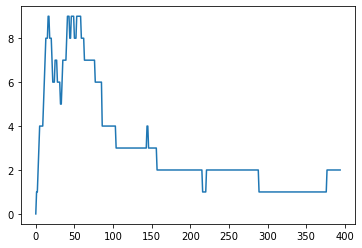

In [11]:
plt.plot(bettis_orig[0])

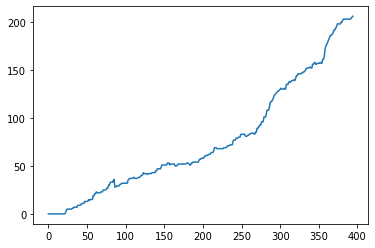

In [12]:
plt.plot(bettis_orig[1])

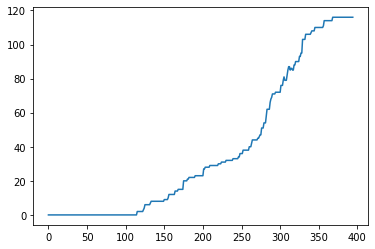

In [13]:
plt.plot(bettis_orig[2])

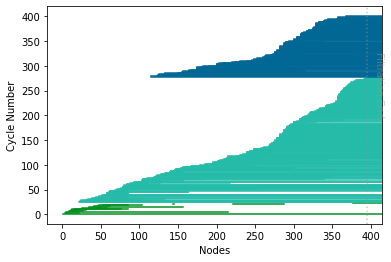

In [14]:
plot_barcode(bars_orig, len(nodes))

In [15]:
# Run persistent homology for null models
num_iters = edges_rewired_weighted.shape[2]
bettis_0_edges_rewired = []
bettis_1_edges_rewired = []
bettis_2_edges_rewired = []
bettis_0_latticized = []
bettis_1_latticized = []
bettis_2_latticized = []

for i in range(num_iters):

  bars_edges_rewired = get_barcode(edges_rewired_weighted[:, :, i])
  bettis_edges_rewired = betti_curves(bars_edges_rewired, len(nodes))
  bettis_0_edges_rewired.append(bettis_edges_rewired[0])
  bettis_1_edges_rewired.append(bettis_edges_rewired[1])
  bettis_2_edges_rewired.append(bettis_edges_rewired[2])

  bars_latticized = get_barcode(latticized_weighted[:, :, i])
  bettis_latticized = betti_curves(bars_latticized, len(nodes))
  bettis_0_latticized.append(bettis_latticized[0])
  bettis_1_latticized.append(bettis_latticized[1])
  bettis_2_latticized.append(bettis_latticized[2])

  print('Null iteration %d processed!' % i)

Null iteration 0 processed!
Null iteration 1 processed!
Null iteration 2 processed!
Null iteration 3 processed!
Null iteration 4 processed!
Null iteration 5 processed!
Null iteration 6 processed!
Null iteration 7 processed!
Null iteration 8 processed!
Null iteration 9 processed!
Null iteration 10 processed!
Null iteration 11 processed!
Null iteration 12 processed!
Null iteration 13 processed!
Null iteration 14 processed!
Null iteration 15 processed!
Null iteration 16 processed!
Null iteration 17 processed!
Null iteration 18 processed!
Null iteration 19 processed!
Null iteration 20 processed!
Null iteration 21 processed!
Null iteration 22 processed!
Null iteration 23 processed!
Null iteration 24 processed!


In [17]:
save_filename = topic[0] + '_bettis.mat'
mdic = {'bettis_orig': bettis_orig, 
        'bettis_0_edges_rewired': bettis_0_edges_rewired, 
        'bettis_1_edges_rewired': bettis_1_edges_rewired,
        'bettis_2_edges_rewired': bettis_2_edges_rewired,
        'bettis_0_latticized': bettis_0_latticized,
        'bettis_1_latticized': bettis_1_latticized,
        'bettis_2_latticized': bettis_2_latticized}
savemat(save_filename, mdic)